In [56]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
#from sklearn.metrics import MeanSquaredError

,GBP/USD Close
count,5100.000000
mean,89.732223
std,63.037321
min,17.040000
25%,45.965000
50%,73.315500
75%,94.187500
max,250.280000


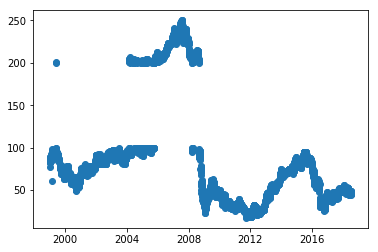

In [30]:
xcg = pd.read_csv('exchange.csv', parse_dates = ['Date'], index_col = 'Date')
plt.scatter(x = xcg.index, y = xcg.values)
xcg.describe()

In [58]:
def predictARIMA(data, params):
    model = ARIMA(data, order = params)
    model_fit = model.fit(disp = 0) # No convergence information provided
    prediction = model_fit.forecast()[0]
    
    return prediction

N = xcg.values.shape[0]
trainingData = xcg.values[: int(N * 0.7), 0].tolist()
testData = xcg.values[int(N * 0.7) :, 0]

arima_params = (3, 1, 0)
predictions = []
i = 0
for x in testData:
    px = predictARIMA(trainingData, arima_params)
    trainingData.append(px)
    predictions.append(px)
    print('Actual = %f, Predicted = %f' % (x, px))

mse = 0
for i in range(testData.shape[0]):
    mse += (predictions[i] - testData[i]) ** 2
    #print(mse)

mse /= testData.shape[0]
print(mse)

Actual = 25.703000, Predicted = 24.576407
Actual = 25.211000, Predicted = 24.545053
Actual = 25.110000, Predicted = 24.552287
Actual = 24.872000, Predicted = 24.529408
Actual = 25.363000, Predicted = 24.507552
Actual = 25.170000, Predicted = 24.492157
Actual = 27.179000, Predicted = 24.474441
Actual = 27.836000, Predicted = 24.456021
Actual = 27.985000, Predicted = 24.438347
Actual = 27.105000, Predicted = 24.420592
Actual = 26.920000, Predicted = 24.402697
Actual = 26.985000, Predicted = 24.384868
Actual = 26.249000, Predicted = 24.367045
Actual = 25.962000, Predicted = 24.349206
Actual = 25.566000, Predicted = 24.331369
Actual = 25.989000, Predicted = 24.313535
Actual = 25.758000, Predicted = 24.295699
Actual = 25.783000, Predicted = 24.277863
Actual = 26.084000, Predicted = 24.260033
Actual = 26.210000, Predicted = 24.242202
Actual = 27.010000, Predicted = 24.224367
Actual = 26.853000, Predicted = 24.206533
Actual = 25.614000, Predicted = 24.188699
Actual = 25.077000, Predicted = 24

Actual = 51.556000, Predicted = 21.085489
Actual = 53.838000, Predicted = 21.067653
Actual = 50.217000, Predicted = 21.049820
Actual = 50.130000, Predicted = 21.031979
Actual = 48.866000, Predicted = 21.014145
Actual = 48.216000, Predicted = 20.996309
Actual = 48.617000, Predicted = 20.978473
Actual = 48.985000, Predicted = 20.960637
Actual = 49.840000, Predicted = 20.942802
Actual = 50.770000, Predicted = 20.924968
Actual = 50.696000, Predicted = 20.907130
Actual = 50.747000, Predicted = 20.889295
Actual = 50.911000, Predicted = 20.871460
Actual = 49.850000, Predicted = 20.853626
Actual = 49.981000, Predicted = 20.835790
Actual = 50.823000, Predicted = 20.817956
Actual = 51.470000, Predicted = 20.800121
Actual = 52.470000, Predicted = 20.782287
Actual = 52.700000, Predicted = 20.764453
Actual = 50.770000, Predicted = 20.746617
Actual = 50.713000, Predicted = 20.728779
Actual = 50.987000, Predicted = 20.710946
Actual = 50.215000, Predicted = 20.693113
Actual = 49.590000, Predicted = 20

KeyboardInterrupt: 